# CHEST CANCER PREDICTION
Link for Dataset=https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images
# Importing Necessary Libraries


In [1]:

import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Dropout
import seaborn as sn
%matplotlib inline

In [2]:
train_folder='C:\\Users\\BOSS\\Desktop\\lung_dis_data\\train'
test_folder='C:\\Users\\BOSS\\Desktop\\lung_dis_data\\test'
val_folder  = 'C:\\Users\\BOSS\\Desktop\\lung_dis_data\\valid'

In [3]:
print("\n\n\t\tTraining Data")
print("\t  ========================\n")
train_c = []
for folder in os.listdir(train_folder):
    train_c.append(folder)
    print("\nTrain "+ folder + " Class: ", len(os.listdir(train_folder + '/' + folder)))

print("\n\n", train_c)

print("\n\n\t\tTesting Data")
print("\t  ========================\n")
test_c = []
for folder in os.listdir(test_folder):
    test_c.append(folder)
    print("\nTest "+ folder + " Class: ", len(os.listdir(test_folder + '/' + folder)))

print("\n\n", test_c)

print("\n\n\t\tValidation Data")
print("\t  ========================\n")
val_c = []
for folder in os.listdir(val_folder):
    val_c.append(folder)
    print("\nValidation "+ folder + " Class: ", len(os.listdir(val_folder + '/' + folder)))

print("\n\n", val_c, "\n")



		Training Data


Train adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib Class:  195

Train large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa Class:  115

Train normal Class:  148

Train squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa Class:  155


 ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


		Testing Data


Test adenocarcinoma Class:  120

Test large.cell.carcinoma Class:  51

Test normal Class:  54

Test squamous.cell.carcinoma Class:  90


 ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']


		Validation Data


Validation adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib Class:  23

Validation large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa Class:  21

Validation normal Class:  13

Validation squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa Class:  15


 ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'norm

In [4]:


train_data = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 613 files belonging to 4 classes.


In [5]:
val_data = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 72 files belonging to 4 classes.


# Buiding the Model and CNN Layer

In [6]:
ml_model = tf.keras.models.Sequential()
ml_model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=[128,128,3]))
ml_model.add(tf.keras.layers.Conv2D(32,(3,3),activation ='relu',padding ='same'))
ml_model.add(tf.keras.layers.MaxPooling2D(strides=2, pool_size = 2 ))

In [7]:
ml_model.add(tf.keras.layers.Conv2D(64,(3,3), activation ='relu', padding = 'same'))
ml_model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu', padding ='same'))
ml_model.add(tf.keras.layers.MaxPooling2D(strides=2, pool_size =2))

In [8]:
ml_model.add(tf.keras.layers.Conv2D(128,(3,3), activation ='relu', padding = 'same'))
ml_model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu', padding ='same'))
ml_model.add(tf.keras.layers.MaxPooling2D(strides=2, pool_size =2))

In [9]:
ml_model.add(tf.keras.layers.Conv2D(256,(3,3), activation ='relu', padding = 'same'))
ml_model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu', padding ='same'))
ml_model.add(tf.keras.layers.MaxPooling2D(strides=2, pool_size =2))

In [10]:
ml_model.add(tf.keras.layers.Flatten())

In [11]:
#Creating a Dense layer
ml_model.add(tf.keras.layers.Dense(1500, activation ='relu'))
ml_model.add(tf.keras.layers.Dropout(0.5)) # We do this to avoid overfitting

In [12]:
#because  we are solving a 4 class problem and we need the probibility of each class
ml_model.add(tf.keras.layers.Dense(4,activation ='softmax')) 

# Compilation and Training Phase

In [13]:
ml_model.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),loss='categorical_crossentropy',
                 metrics=['accuracy'])
ml_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                   

In [14]:
epochs =30
history = ml_model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
)

Epoch 1/30


39/39 [==============================] - 39s 942ms/step - loss: 9.3667 - accuracy: 0.2855 - val_loss: 1.3753 - val_accuracy: 0.3472
Epoch 2/30
39/39 [==============================] - 38s 961ms/step - loss: 1.1615 - accuracy: 0.4535 - val_loss: 1.0050 - val_accuracy: 0.5417
Epoch 3/30
39/39 [==============================] - 38s 960ms/step - loss: 0.9046 - accuracy: 0.6069 - val_loss: 0.8111 - val_accuracy: 0.6667
Epoch 4/30
39/39 [==============================] - 37s 948ms/step - loss: 0.7747 - accuracy: 0.6623 - val_loss: 0.9016 - val_accuracy: 0.5139
Epoch 5/30
39/39 [==============================] - 39s 978ms/step - loss: 0.7309 - accuracy: 0.7129 - val_loss: 0.6646 - val_accuracy: 0.7500
Epoch 6/30
39/39 [==============================] - 37s 951ms/step - loss: 0.5553 - accuracy: 0.7618 - val_loss: 0.7476 - val_accuracy: 0.7083
Epoch 7/30
39/39 [==============================] - 38s 962ms/step - loss: 0.4894 - accuracy: 0.8042 - val_loss: 0.9233 - val_accuracy: 0.63

In [15]:
#Performing model evaluation
train_loss,train_acc = ml_model.evaluate(train_data)
print('Training accuracy:', train_acc)

39/39 [==============================] - 10s 253ms/step - loss: 0.0025 - accuracy: 0.9984
Training accuracy: 0.9983686804771423


In [16]:
val_loss, val_acc = ml_model.evaluate(val_data)
print('Validation accuracy:', val_acc)

5/5 [==============================] - 1s 218ms/step - loss: 0.4585 - accuracy: 0.8889
Validation accuracy: 0.8888888955116272


# Saving the ML model

In [17]:
ml_model.save('trained_chest_scan_model.keras')

In [18]:
history.history #here we return Dictionary of the training history

{'loss': [9.366715431213379,
  1.1614660024642944,
  0.904619574546814,
  0.7746891975402832,
  0.7308651804924011,
  0.5552954077720642,
  0.4893736243247986,
  0.4790576696395874,
  0.3311477303504944,
  0.45025569200515747,
  0.24458026885986328,
  0.22184616327285767,
  0.15030357241630554,
  0.17905762791633606,
  0.17677217721939087,
  0.08260787278413773,
  0.07277850061655045,
  0.15870004892349243,
  0.16879335045814514,
  0.13760462403297424,
  0.06940866261720657,
  0.07052606344223022,
  0.025198308750987053,
  0.014140945859253407,
  0.011683923192322254,
  0.014771237038075924,
  0.010714437812566757,
  0.00974066462367773,
  0.001208405359648168,
  0.006754573434591293],
 'accuracy': [0.2854812443256378,
  0.45350733399391174,
  0.6068515777587891,
  0.6623165011405945,
  0.7128874659538269,
  0.7618270516395569,
  0.804241418838501,
  0.8026100993156433,
  0.8776509165763855,
  0.8238173127174377,
  0.9151712656021118,
  0.9151712656021118,
  0.9575856328010559,
  0.926

In [19]:
#Recording my model history in json
import json
with open('history.json','w') as f:
  json.dump(history.history,f)

In [20]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


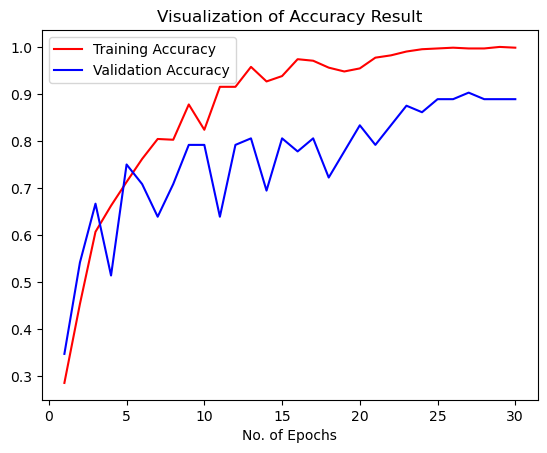

In [21]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Checking other metrics for model evaluation

In [22]:
class_name = val_data.class_names
class_name

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [23]:
test_data= tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 315 files belonging to 4 classes.


In [24]:
y_pred =ml_model.predict(test_data)
y_pred,y_pred.shape

20/20 [==============================] - 6s 264ms/step


(array([[9.9003321e-01, 6.0139092e-07, 1.2093995e-10, 9.9661369e-03],
        [4.5401384e-03, 1.3400391e-02, 1.2220964e-03, 9.8083740e-01],
        [4.4877362e-01, 3.5587493e-02, 3.8193455e-03, 5.1181948e-01],
        ...,
        [3.5995594e-04, 4.0207524e-06, 2.7059948e-09, 9.9963593e-01],
        [4.4629749e-07, 8.3619077e-04, 9.0892392e-04, 9.9825436e-01],
        [9.6086849e-05, 9.4584185e-01, 1.7843295e-04, 5.3883601e-02]],
       dtype=float32),
 (315, 4))

In [25]:
#selecting the maximum probability class
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(315,), dtype=int64, numpy=
array([0, 3, 3, 3, 3, 1, 0, 3, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 3, 3, 1, 0,
       3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 0, 3, 1, 1, 2, 0, 0, 0, 1, 3, 2, 1,
       2, 0, 3, 0, 2, 3, 3, 3, 0, 2, 0, 2, 1, 3, 3, 1, 1, 3, 0, 2, 3, 0,
       2, 1, 3, 3, 0, 3, 3, 0, 0, 3, 1, 0, 3, 1, 0, 3, 3, 3, 3, 3, 3, 0,
       1, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 1, 0, 3, 0, 3, 1, 2, 1, 1, 3, 3,
       0, 1, 3, 1, 3, 3, 1, 0, 3, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 3, 2, 1, 1, 1, 1, 3,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 1, 3, 0, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1,
     

In [26]:
# we need the true categories
true_categories = tf.concat([y for x, y in test_data], axis=0)#axis =0 concats in row fashion
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(315,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
     

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
# Printing the classification report
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.77      0.25      0.38       120
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.47      0.76      0.58        51
                                          normal       0.80      0.94      0.86        54
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.56      0.80      0.66        90

                                        accuracy                           0.61       315
                                       macro avg       0.65      0.69      0.62       315
                                    weighted avg       0.67      0.61      0.57       315



# Visualizing the confusion matrix

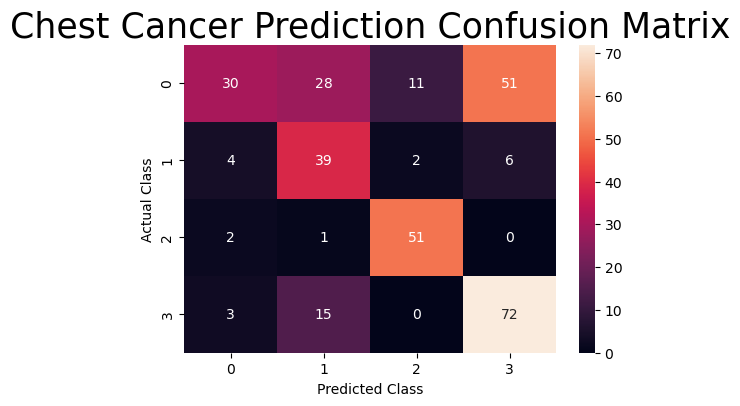

In [28]:
plt.figure(figsize=(6, 4))
sn.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Chest Cancer Prediction Confusion Matrix',fontsize = 25)
plt.show()